In [ ]:
#!pip install nltk 
#!pip install pyldavis 
#!pip install stanza
#!pip install wordcloud 
#!pip install openturns
!pip install -U setuptools
!pip install reliability
#!apt update && apt install -y libsm6 libxext6

In [ ]:
#https://towardsdatascience.com/exploratory-data-analysis-for-natural-language-processing-ff0046ab3571

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [1]:
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
DATA_PATH = '../../data/mercado-livre-pt-only'
TRAIN_DATASET = os.path.join(DATA_PATH, 'train.csv')
VAL_DATASET = os.path.join(DATA_PATH, 'val.csv')
TEST_DATASET  = os.path.join(DATA_PATH, 'test.csv')

In [9]:
def read_data(filename):
    data = pd.read_csv(filename, sep=",", names =['utterance','label'], header=None, dtype={'utterance':str, 'label': str} )
    return data

In [10]:
train_data = read_data(TRAIN_DATASET)
val_data = read_data(VAL_DATASET)
test_data = read_data(TEST_DATASET)
full_dataset = pd.concat([train_data, val_data, test_data], ignore_index=True)
full_dataset.head()

,utterance,label
0,cabo fio de aco pesca flexivel marine sports 9...,FISHING_LINES
1,carregador motorola turbo original moto x play...,MOBILE_DEVICE_CHARGERS
2,oculos masculino feminino protecao solar grand...,SUNGLASSES
3,freezer consul fre descongelamento automatic...,FREEZERS
4,roda i30 - aro 17 original,CAR_WHEELS


In [11]:
print(len(train_data))
print(len(val_data))
print(len(test_data))

498780
55420
138550


In [12]:
len(full_dataset)

692750

### Remove data from labels containing less then 10 examples:

In [13]:
bytag = full_dataset.groupby('label').aggregate(np.count_nonzero)
df_qty_label = bytag.sort_values(by='utterance', ascending=False)
print(df_qty_label)

                              utterance
label                                  
CAR_SEAT_COVERS                    4711
AUTOMOTIVE_SHIFT_LEVER_KNOBS       4689
CAR_ANTENNAS                       4671
FOOTBALL_SHIRTS                    4603
SURVEILLANCE_CAMERAS               4544
...                                 ...
TOOTHBRUSH_HOLDERS                   10
BASKET_BALLS                         10
SWIMMING_NOSE_CLIPS                  10
DENTAL_FLOSSES                       10
BINDING_SPINES                       10

[1048 rows x 1 columns]


In [16]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_colwidth', None)
print(df_qty_label[0:2000])

                                             utterance
label                                                 
CAR_SEAT_COVERS                                   4711
AUTOMOTIVE_SHIFT_LEVER_KNOBS                      4689
CAR_ANTENNAS                                      4671
FOOTBALL_SHIRTS                                   4603
SURVEILLANCE_CAMERAS                              4544
VIDEO_GAMES                                       4539
WALLPAPERS                                        4423
WRISTWATCHES                                      4378
SUNGLASSES                                        4375
CARPETS                                           4284
HANDBAGS                                          4250
DOLLS                                             4214
BOOKS                                             4169
LIGHT_BULBS                                       4146
RAM_MEMORY_MODULES                                4109
JACKETS_AND_COATS                                 4073
MOBILE_DEV

In [18]:
pd.set_option('display.max_rows', 130)
pd.set_option('display.max_colwidth', None)
#dd = full_dataset[full_dataset['label'].isin(['Sintomas.Qualificado.Equipamento liga e desliga sozinho'])]
full_dataset.head(100)

,utterance,label
0,cabo fio de aco pesca flexivel marine sports 90lbs - 10m,FISHING_LINES
1,carregador motorola turbo original moto x play-nao e replica,MOBILE_DEVICE_CHARGERS
2,oculos masculino feminino protecao solar grande mestre 2018,SUNGLASSES
3,freezer consul fre descongelamento automatico 6 gavetas e,FREEZERS
4,roda i30 - aro 17 original,CAR_WHEELS
5,torneira de lavatorio bica alta desc-302,BATHROOM_FAUCETS
6,balcao refrigerado start tx de centro 3 portas - tramontina,FREEZERS
7,boneco naruto uzumaki articulado - pronta entrega,ACTION_FIGURES
8,fonte de 12v 1amp 5.5x2.5 mm para uso em geral,MOBILE_DEVICE_CHARGERS
9,oculos masculino aviador polarizado original veithdia 3811,SUNGLASSES


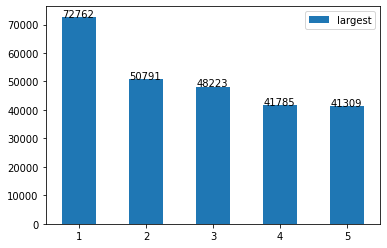

In [19]:
largest_qtys = [72762,50791,48223,41785,41309] 
smallest_qtys = [33,32,20,14,11]
index = [1,2,3,4,5]
df2 = pd.DataFrame({'largest': largest_qtys}, index = index)
ax = df2.plot.bar(figsize=(6,4),rot=0)
x_offset = -0.2
y_offset = 0.2
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)        
    ax.annotate(val, (b.x0, b.y1 + y_offset))

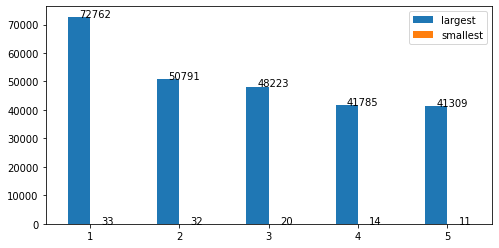

In [20]:
largest_qtys = [72762,50791,48223,41785,41309] 
smallest_qtys = [33,32,20,14,11]
index = [1,2,3,4,5]
df2 = pd.DataFrame({'largest': largest_qtys, 'smallest': smallest_qtys}, index = index)
ax = df2.plot.bar(figsize=(8,4),rot=0)
x_offset = 0
y_offset = 0.2
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

<AxesSubplot:>

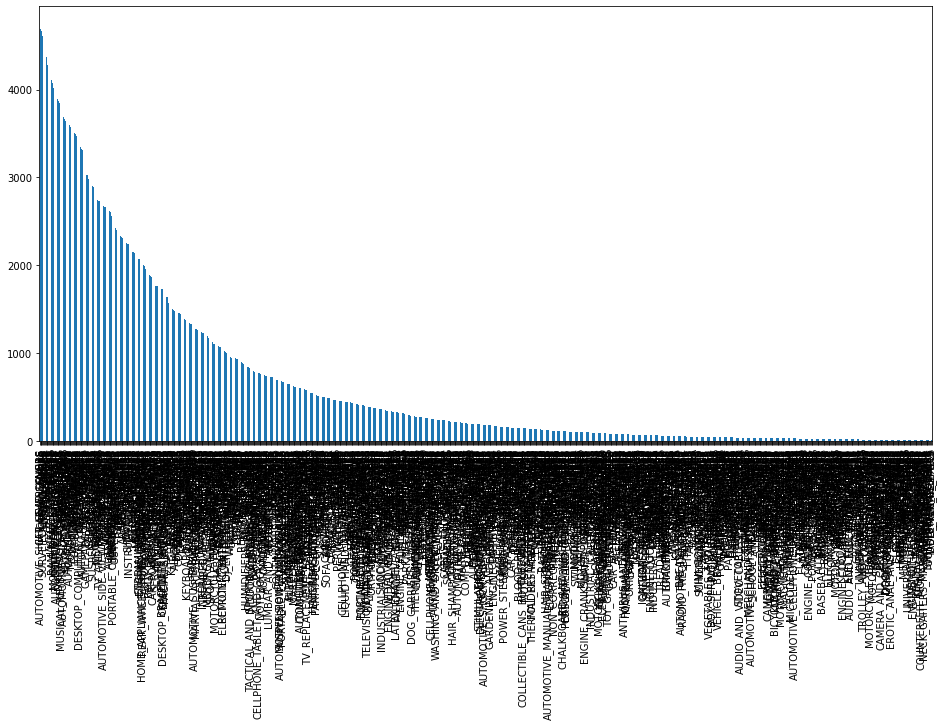

In [21]:
full_dataset.label.value_counts().plot.bar(figsize=(16,8))

###  Sentence size (token number) distribution

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


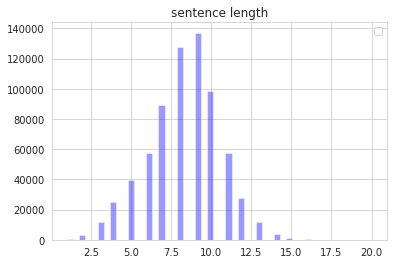

No handles with labels found to put in legend.


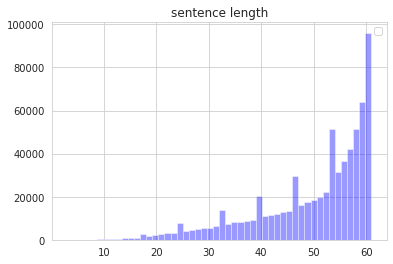

In [47]:
def getSentenceLen(str):
    import re
    try:
        return len(re.findall(r'\w+', str))
    except:
        return 0
    
def getSentenceCharLen(str):
    import re
    try:
        return len(str)
    except:
        return 0    

sns.set_style("whitegrid")
length_checker = np.vectorize(getSentenceLen) 
char_length_checker = np.vectorize(getSentenceCharLen) 
sentence_len = length_checker(full_dataset['utterance']) 
char_sentence_len = char_length_checker(full_dataset['utterance']) 

sns.distplot(sentence_len,bins= 50, hist=True, kde=False, color='b')
plt.title('sentence length'); plt.legend()
plt.show()

sns.distplot(char_sentence_len,bins= 40, hist=True, kde=False, color='b')
plt.title('sentence length'); plt.legend()
plt.show()


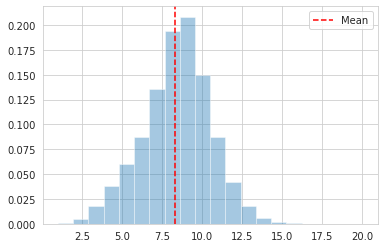

In [107]:
ax_hist = plt.subplot()
mean = sentence_len.mean()
#sentence_len.median()
#sentence_len.mode().get_values()[0]

sns.distplot(sentence_len, ax=ax_hist,bins= 20,kde=False,norm_hist=True)
ax_hist.axvline(mean, color='r', linestyle='--')
#ax_hist.axvline(median, color='g', linestyle='-')
#ax_hist.axvline(mode, color='b', linestyle='-')

#plt.legend({'Mean':mean,'Median':median,'Mode':mode})
plt.legend({'Mean':mean})
plt.show()

In [80]:
sentence_len.mean()

8.302507398051246

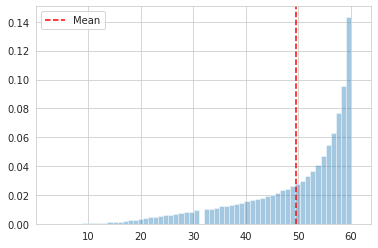

In [70]:
ax_hist = plt.subplot()
mean = char_sentence_len.mean()
#sentence_len.median()
#sentence_len.mode().get_values()[0]

sns.distplot(char_sentence_len, ax=ax_hist,bins= 60,kde=False,norm_hist=True)
ax_hist.axvline(mean, color='r', linestyle='--')
#ax_hist.axvline(median, color='g', linestyle='-')
#ax_hist.axvline(mode, color='b', linestyle='-')

#plt.legend({'Mean':mean,'Median':median,'Mode':mode})
plt.legend({'Mean':mean})
plt.show()

In [96]:
print('min seq len ', char_sentence_len.min())
print('max seq len ', char_sentence_len.max())
print('mean ', char_sentence_len.mean())
print('std dev ', char_sentence_len.std())

min seq len  3
max seq len  61
mean  49.64454709491159
std dev  10.762969199667923


<AxesSubplot:>

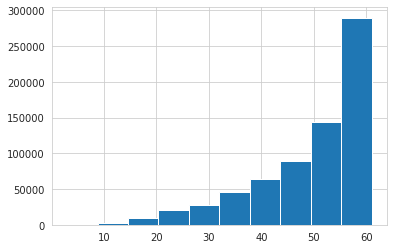

In [32]:
full_dataset['utterance'].str.len().hist()

<AxesSubplot:>

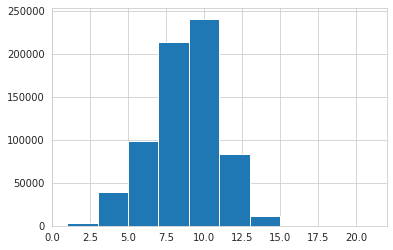

In [33]:
full_dataset['utterance'].str.split().\
    map(lambda x: len(x)).\
    hist()

<AxesSubplot:>

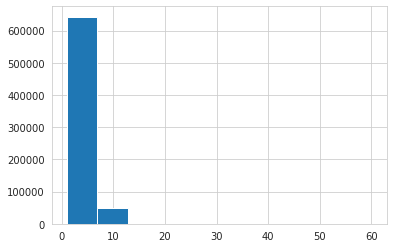

In [34]:
full_dataset['utterance'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

In [35]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
corpus=[]
new= full_dataset['utterance'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]
from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop_words:
        dic[word]+=1

<BarContainer object of 10 artists>

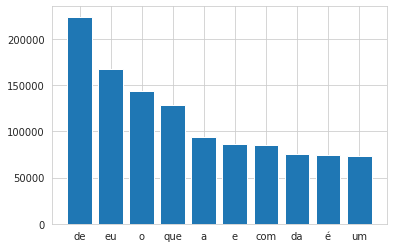

In [54]:
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

<AxesSubplot:>

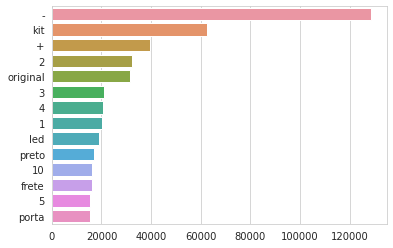

In [39]:
import collections
counter=collections.Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:20]:
    if (word not in stop_words):
        if (word == 'sky'):
            x.append('[company name]')
        else:
            x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

<AxesSubplot:>

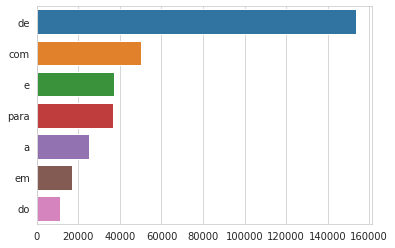

In [40]:
import collections
counter=collections.Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:40]:
    if (word in stop_words):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [41]:
# Code Snippet for Top N-grams Barchart

import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('portuguese'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

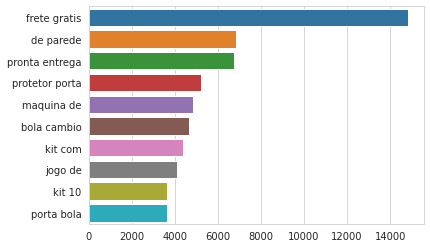

In [42]:
plot_top_ngrams_barchart(full_dataset['utterance'],2)

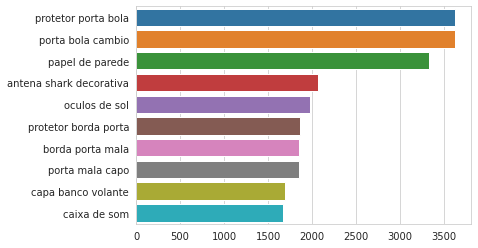

In [43]:
plot_top_ngrams_barchart(full_dataset['utterance'],3)

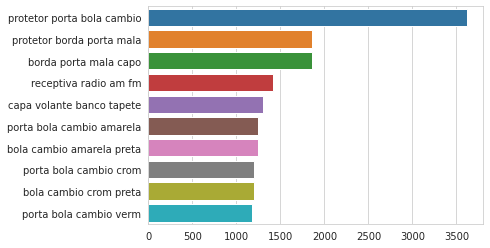

In [44]:
plot_top_ngrams_barchart(full_dataset['utterance'],4)

In [32]:
import numpy as np
import nltk
from nltk.corpus import stopwords
import pyLDAvis.gensim
import stanza

stanza.download('pt')
nlp = stanza.Pipeline('pt')


def get_lda_objects2(text):
    nltk.download('stopwords')    
    stop=set(stopwords.words('portuguese'))
    def _preprocess_text(text):
        corpus=[]
        for news in text:
            for sent in nlp(news).sentences:
                words=[w.lemma for w in sent.words if (w.text not in stop and len(w.text) >2)]
                corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
    return vis

2021-03-15 11:37:50 INFO: Downloading default packages for language: pt (Portuguese)...
2021-03-15 11:37:50 INFO: File exists: /root/stanza_resources/pt/default.zip.
2021-03-15 11:37:52 INFO: Finished downloading models and saved to /root/stanza_resources.
2021-03-15 11:37:52 INFO: Loading these models for language: pt (Portuguese):
| Processor | Package |
-----------------------
| tokenize  | bosque  |
| mwt       | bosque  |
| pos       | bosque  |
| lemma     | bosque  |
| depparse  | bosque  |

2021-03-15 11:37:53 INFO: Use device: gpu
2021-03-15 11:37:53 INFO: Loading: tokenize
2021-03-15 11:37:56 INFO: Loading: mwt
2021-03-15 11:37:56 INFO: Loading: pos
2021-03-15 11:37:57 INFO: Loading: lemma
2021-03-15 11:37:57 INFO: Loading: depparse
2021-03-15 11:37:58 INFO: Done loading processors!


In [ ]:
lda_model, bow_corpus, dic = get_lda_objects2(full_dataset['utterance'])

In [ ]:
lda_model.show_topics()

In [ ]:
plot_lda_vis(lda_model, bow_corpus, dic)

In [ ]:
import numpy as np
import nltk
from nltk.corpus import stopwords
import pyLDAvis.gensim
import stanza

stanza.download('pt')
nlp = stanza.Pipeline('pt')


def getCorpus(text):
    nltk.download('stopwords')
    stop = stopwords.words('portuguese')
    def _preprocess_text(text):
        corpus=[]
        for news in text:
            for sent in nlp(news).sentences:
                words=[w.lemma for w in sent.words if (w.text not in stop and len(w.text) >2)]
                corpus.append(words)
        return corpus
    
    return _preprocess_text(text)

In [ ]:
from wordcloud import WordCloud
nltk.download('stopwords')
stop = stopwords.words('portuguese')

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

corpus=getCorpus(full_dataset['utterance'].head(10))

In [ ]:
corpus

In [ ]:
show_wordcloud(corpus)

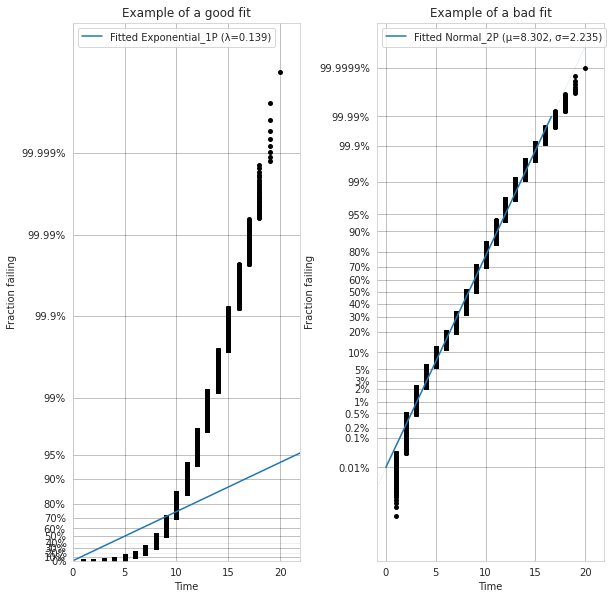

In [73]:
from reliability.Probability_plotting import Weibull_probability_plot, Exponential_probability_plot, Normal_probability_plot
from reliability.Distributions import Weibull_Distribution
import matplotlib.pyplot as plt

plt.subplot(121)
Exponential_probability_plot(failures=y)
plt.title('Example of a good fit')
plt.subplot(122)
Normal_probability_plot(failures=y)
plt.title('Example of a bad fit')
plt.subplots_adjust(bottom=0.1, right=0.94, top=0.93, wspace=0.34)  # adjust the formatting
plt.show()

In [75]:
sentence_df = pd.DataFrame(sentence_len, columns = ['length'])
char_sentence_df = pd.DataFrame(char_sentence_len, columns = ['length'])

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
from six.moves import urllib
import zipfile
from scipy import stats

list_of_dists = ['alpha','anglit','arcsine','beta','betaprime','bradford','burr','burr12','cauchy','chi','chi2','cosine','dgamma','dweibull','erlang','expon','exponnorm','exponweib','exponpow','f','fatiguelife','fisk','foldcauchy','foldnorm','weibull_min','weibull_max','genlogistic','genpareto','gennorm','genexpon','genextreme','gausshyper','gamma','gengamma','genhalflogistic','gilbrat','gompertz','gumbel_r','gumbel_l','halfcauchy','halflogistic','halfnorm','halfgennorm','hypsecant','invgamma','invgauss','invweibull','johnsonsb','johnsonsu','kstwobign','laplace','levy','levy_l','logistic','loggamma','loglaplace','lognorm','lomax','maxwell','mielke','nakagami','ncx2','ncf','nct','norm','pareto','pearson3','powerlaw','powerlognorm','powernorm','rdist','reciprocal','rayleigh','rice','recipinvgauss','semicircular','t','triang','truncexpon','truncnorm','tukeylambda','uniform','vonmises','vonmises_line','wald','weibull_min','weibull_max']
results = []
for i in list_of_dists:
    dist = getattr(stats, i)
    param = dist.fit(sentence_df['length'][0:20000])
    a = stats.kstest(sentence_df['length'][0:20000], i, args=param)
    print(a)
    results.append((i,a[0],a[1]))
    
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

KstestResult(statistic=0.13954436888472505, pvalue=0.0)
KstestResult(statistic=0.34800649192948474, pvalue=0.0)
KstestResult(statistic=0.40872467199474094, pvalue=0.0)
KstestResult(statistic=0.1052336414733927, pvalue=2.625473021770218e-193)
KstestResult(statistic=0.12410448217720854, pvalue=6.10603358545948e-269)
KstestResult(statistic=0.3370200241717697, pvalue=0.0)
KstestResult(statistic=0.10151005132886204, pvalue=7.20317680422082e-180)
KstestResult(statistic=0.1028149498290431, pvalue=1.5988382092587576e-184)
KstestResult(statistic=0.12337172430030718, pvalue=9.074928273262107e-266)
KstestResult(statistic=0.1216975939179033, pvalue=1.3603681587216322e-258)
KstestResult(statistic=0.13085036694003727, pvalue=4.871512999245502e-299)
KstestResult(statistic=0.2775215522619603, pvalue=0.0)
KstestResult(statistic=0.13707567936986154, pvalue=0.0)
KstestResult(statistic=0.12680349607911978, pvalue=8.659773107955344e-281)
KstestResult(statistic=0.12353353273287138, pvalue=1.815591980210852e

In [91]:
char_sentence_df['length'][0:10000]

0       56
1       60
2       60
3       60
4       28
        ..
9995    42
9996    36
9997    48
9998    56
9999    59
Name: length, Length: 10000, dtype: int64

In [57]:
import scipy.stats
from scipy.stats import *
from sklearn.preprocessing import StandardScaler

In [58]:
dist_names = ['expon','powerlaw','powerlognorm','powernorm','rayleigh']       

In [59]:
sentence_df = pd.DataFrame(sentence_len, columns = ['length'])

In [60]:
def standarise(data,pct,pct_lower):
    sc = StandardScaler() 
    y = data[data.notnull()].to_list()
    y.sort()
    len_y = len(y)
    y = y[int(pct_lower * len_y):int(len_y * pct)]
    len_y = len(y)
    yy=([[x] for x in y])
    sc.fit(yy)
    y_std =sc.transform(yy)
    y_std = y_std.flatten()
    return y_std,len_y,y

In [63]:
def fit_distribution(data,pct,pct_lower):
    # Set up list of candidate distributions to use
    # See https://docs.scipy.org/doc/scipy/reference/stats.html for more
    y_std,size,y_org = standarise(data,pct,pct_lower)
    dist_names = ['norm']      

    chi_square_statistics = []
    # 11 bins
    percentile_bins = np.linspace(0,100,9)
    percentile_cutoffs = np.percentile(y_std, percentile_bins)
    observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
    cum_observed_frequency = np.cumsum(observed_frequency)
    
    # Loop through candidate distributions

    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(scipy.stats, distribution)
        param = dist.fit(y_std)
        print("{}\n{}\n".format(dist, param))
      

        # Get expected counts in percentile bins
        # cdf of fitted sistrinution across bins
        cdf_fitted = dist.cdf(percentile_cutoffs, *param)
        expected_frequency = []
        for bin in range(len(percentile_bins)-1):
            expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
            expected_frequency.append(expected_cdf_area)

        # Chi-square Statistics
        expected_frequency = np.array(expected_frequency) * size
        #print(expected_frequency)
        cum_expected_frequency = np.cumsum(expected_frequency)
        ss = round(sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency),0)
        
        chi_square_statistics.append(ss)


    #Sort by minimum ch-square statistics
    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['chi_square'] = chi_square_statistics
    results.sort_values(['chi_square'], inplace=True)


    print ('\nDistributions listed by Betterment of fit:')
    print ('............................................')
    print (results)

In [64]:
fit_distribution(sentence_df['length'],100,0.0)

(2.6257515749489087e-17, 1.0000000000000002)

(-3.2676537741641183, 3.2676537741641183)

(0.029038662692536382, -0.02902494394530474, 0.9995857482895644)

(0.005788632185431448, -172.64145931971188, 172.6360475724826)

(0.015023437681579516, -8.693713488537902, 578.407480205223)

(468.06370961629636, -21.787408575163795, 0.04654658958925435)


Distributions listed by Betterment of fit:
............................................
  Distribution  chi_square
0         norm      111509
2    exponnorm      111514
3      lognorm      115492
5        gamma      123876
4     invgauss      175247
1        expon 1.72322e+06


In [65]:
y_std,len_y,y = standarise(sentence_df['length'],100,0.0)

Text(0, 0.5, 'Qty')

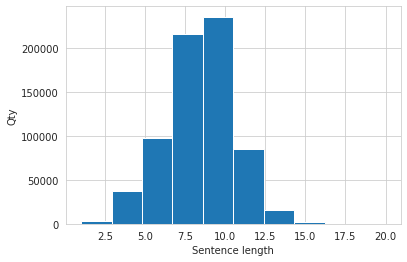

In [66]:
plt.hist(y)
plt.xlabel('Sentence length')
plt.ylabel('Qty')

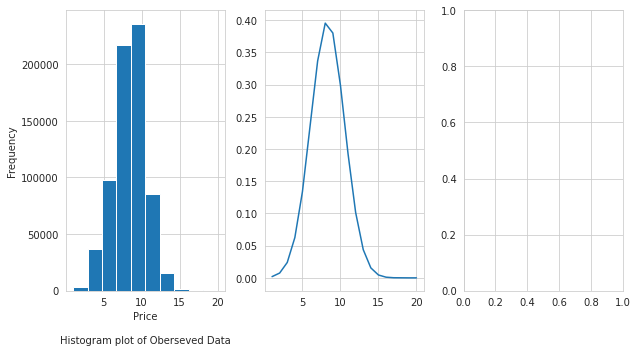

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 5))
axes[0].hist(y)
axes[0].set_xlabel('Price\n\nHistogram plot of Oberseved Data')
axes[0].set_ylabel('Frequency')
axes[1].plot(y,norm.pdf(y_std,2.6257515749489087e-17, 1.0000000000000002))
fig.tight_layout()